# Fire up turicreate

In [1]:
import turicreate

# Load some house sales data

In [2]:
sales = turicreate.SFrame('home_data.sframe/')

In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# Exploring the data for housing sales

In [4]:
x = sales['sqft_living']

In [5]:
y = sales['price']

In [6]:
turicreate.visualization.set_target('auto')

In [7]:
turicreate.visualization.scatter(sales["sqft_living"], 
                                 sales["price"], 
                                 xlabel = "Square ft", 
                                 ylabel = "Sale Price")

# Simple regression model

# Split into training and test data

In [8]:
train_data,test_data = sales.random_split(.8, seed = 0)

# Build the regression model

In [35]:
sqft_model = turicreate.linear_regression.create(train_data, target = 'price', features = ['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.033127     | 3803195.748938     | 4197825.781540       | 186499.050403                   | 236506.432026                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Evaluate the simple model

In [10]:
print(round(test_data['price'].mean(),2))

543054.04


In [11]:
sqft_model.evaluate(test_data)

{'max_error': 4134503.8649471584, 'rmse': 255205.53496748075}

# Show what our predictions look like

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

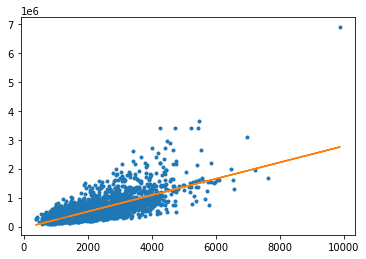

In [13]:
plt.plot(test_data['sqft_living'], test_data['price'], '.', test_data['sqft_living'], sqft_model.predict(test_data), '-')

In [14]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-48493.41483359842,5066.1073147587085
sqft_living,None,283.0120879561618,2.225094378667306


# Explore other features in the data

In [15]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [16]:
sales[my_features].show()

Materializing SFrame

In [17]:
turicreate.visualization.box_plot(x = sales['zipcode'], y = sales['price'])

# Build a regression model with more features

In [18]:
my_features_model = turicreate.linear_regression.create(train_data, target = 'price', features = my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.043086     | 4081401.993670     | 2157038.345082       | 189582.690634                   | 182535.244443                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [20]:
print(sqft_model.evaluate(test_data))
print(my_features_model.evaluate(test_data))

{'max_error': 4134503.8649471584, 'rmse': 255205.53496748075}
{'max_error': 3144611.746109863, 'rmse': 180543.95140684684}


# Apply learned models to predict prices of 3 houses

In [21]:
house1 = sales[sales['id'] == '5309101200']

In [22]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [24]:
print(house1['price'])

[620000.0, ... ]


In [25]:
print(sqft_model.predict(house1))

[630735.5962611899]


In [26]:
print(my_features_model.predict(house1))

[728787.5639767874]


# Prediction for a second, fancier house

In [27]:
house2 = sales[sales['id'] == '1925069082']

In [28]:
print(house2['price'])

[2200000.0, ... ]


In [29]:
print(sqft_model.predict(house2))

[1264682.673282992]


In [30]:
print(my_features_model.predict(house2))

[1235636.2785033511]


# Last house, super fancy

In [31]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [34]:
print(my_features_model.predict(turicreate.SFrame(bill_gates)))

[15051367.399098633]


# Comparing:

In [ ]:
house_3 = sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] < 4000 )]